In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.rename(columns={'v1':"target","v2":"text"},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["target"] = encoder.fit_transform(df["target"])

In [10]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df  =  df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

In [15]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x241bcc82200>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

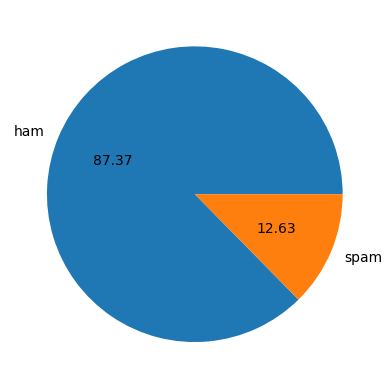

In [16]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham",'spam'],autopct='%0.2f')

In [17]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']=df["text"].apply(len)

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_of_words'] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df["num_sentences"]= df["text"].apply(lambda x:len( nltk.sent_tokenize(x)))

In [22]:
df[["num_characters","num_of_words","num_sentences"]].describe()

,num_characters,num_of_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df["target"]==0][["num_characters","num_of_words","num_sentences"]].describe()

,num_characters,num_of_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df["target"]==1][["num_characters","num_of_words","num_sentences"]].describe()

,num_characters,num_of_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

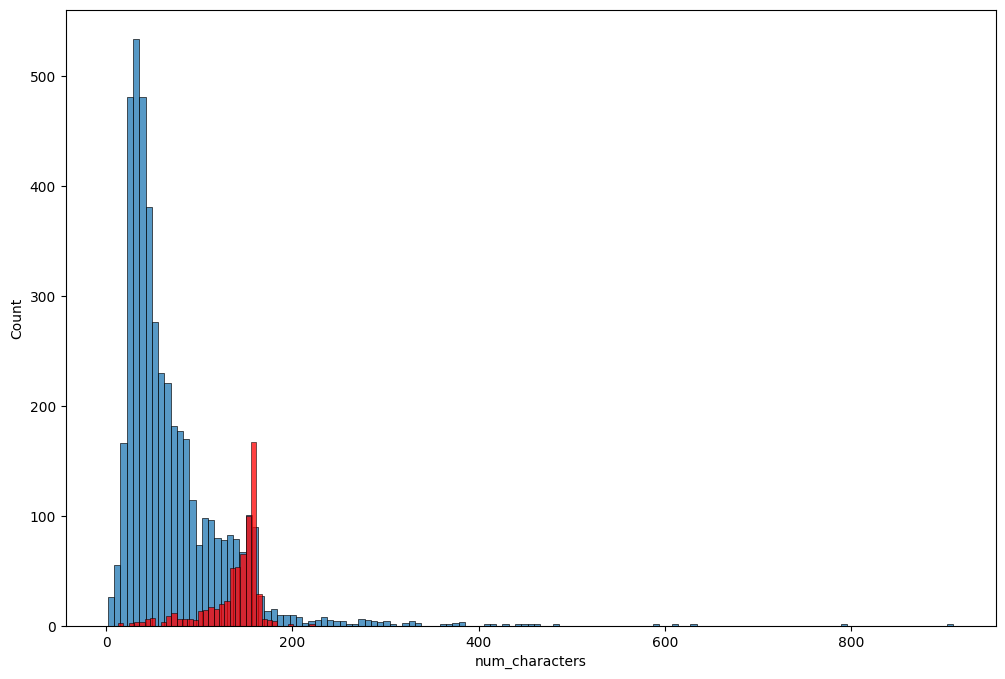

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

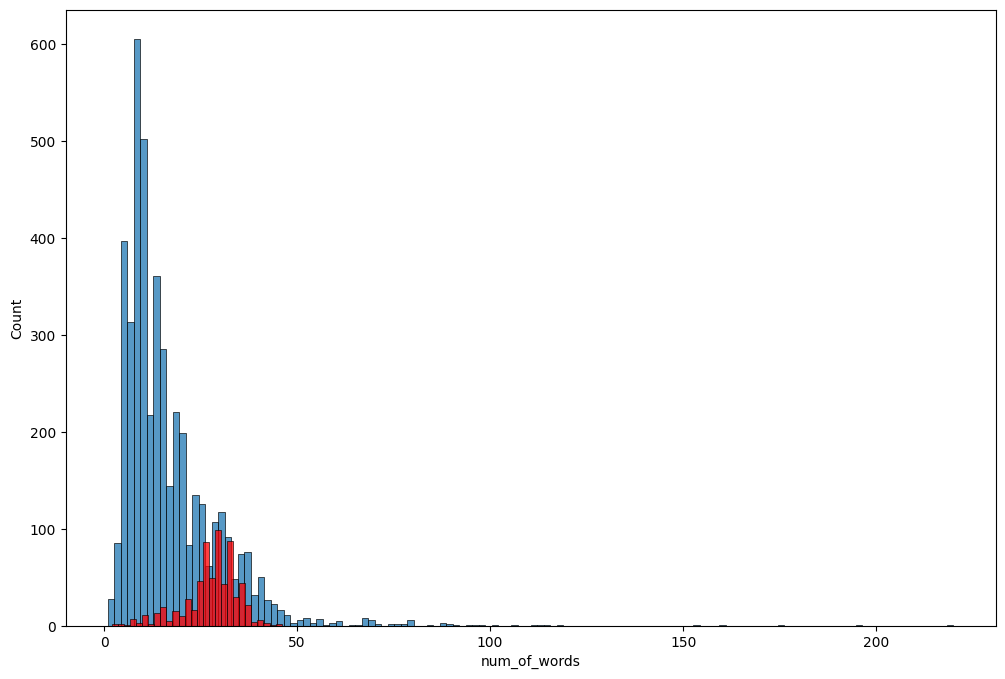

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"]==0]["num_of_words"])
sns.histplot(df[df["target"]==1]["num_of_words"],color='red')

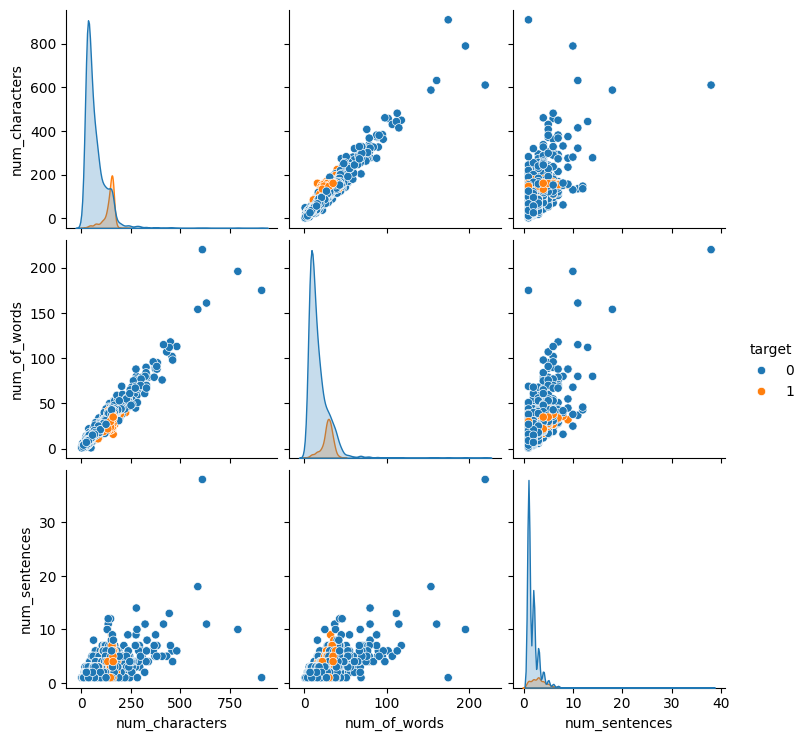

In [28]:
sns.pairplot(df,hue="target")

<Axes: >

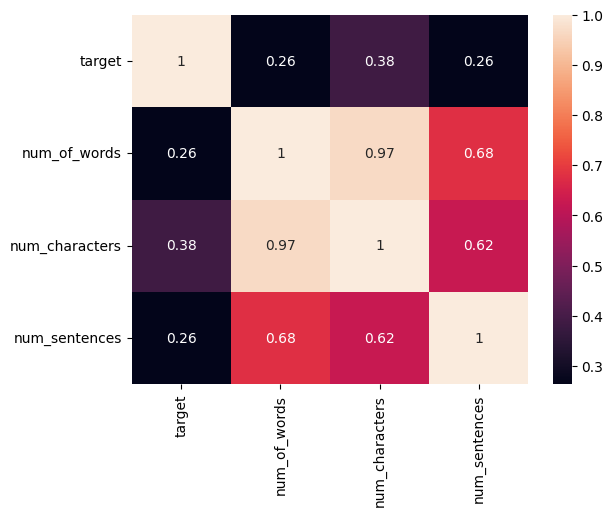

In [29]:
sns.heatmap(df[["target","num_of_words","num_characters","num_sentences"]].corr(),annot=True)

In [30]:
# lower case
# tokenization
# remove special char
# stopwords and punctuation
# stemming or lemmetization
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i  not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [31]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [32]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [33]:
df["transformed_text"] = df["text"].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_of_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud 

In [36]:
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color='white')

In [37]:
spam_wc = wc.generate(df[df['target']==1]["transformed_text"].str.cat(sep=" "))

In [38]:
ham_wc = wc.generate(df[df['target']==0]["transformed_text"].str.cat(sep=" "))

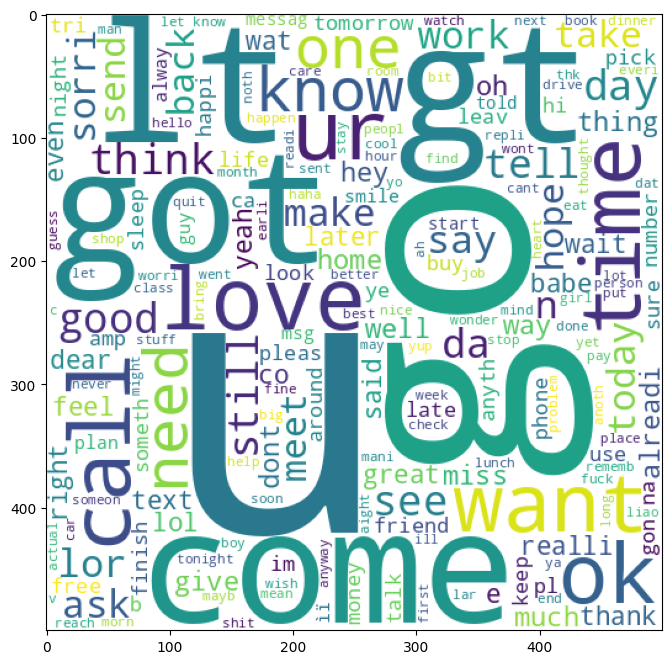

In [39]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

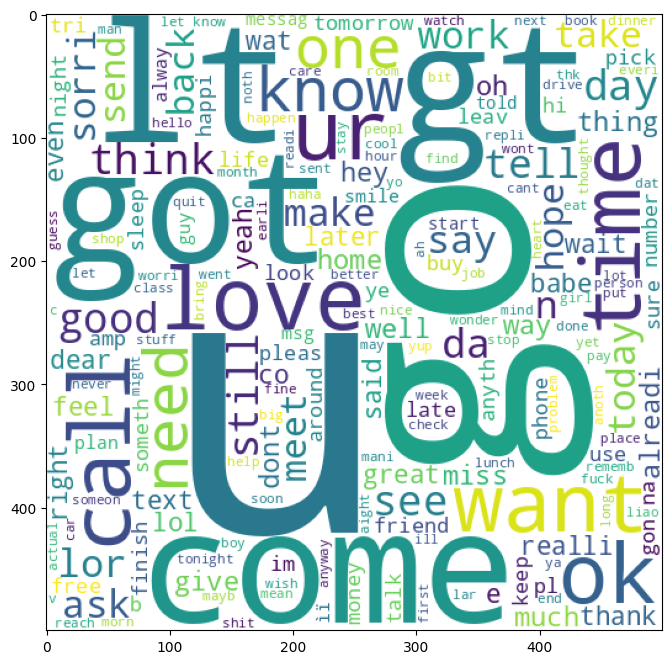

In [40]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [41]:
# df.head()


In [42]:
spam_corpus= []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
spam_corpus[:10]

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']

In [44]:
len(spam_corpus)

9939

In [45]:
ham_corpus= []
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [46]:
len(ham_corpus)

35404

In [47]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
x = tfidf.fit_transform(df["transformed_text"]).toarray()

In [50]:
x.shape

(5169, 3000)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [52]:
x= scaler.fit_transform(x)

In [53]:
y = df["target"].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [56]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [59]:
# gnb.fit(x_train,y_train)
# y_pred1 = gnb.predict(x_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [60]:
# mnb.fit(x_train,y_train)
# y_pred2 = gnb.predict(x_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [61]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("accurecy:",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("precesion:",precision_score(y_test,y_pred3))

accurecy: 0.9835589941972921
[[895   1]
 [ 16 122]]
precesion: 0.991869918699187


In [64]:
import pickle 
pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(bnb,open('model.pkl','wb'))